## Numerical Methods Week 1
# Fundamentals & Solving Equations 
## Based on Tim Sauer's "Numerical Analysis" (Chapters 0 & 1)

#### 1.0 Importing required Python modules

In [1]:
import numpy as np
from sympy import *
from decimal import Decimal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import optimize
from collections import Counter

from IPython.display import Image
import warnings; warnings.simplefilter('ignore')

## 0. Fundamentals

### 0.1 Evaluating a Polynomial

#### Direct evaluation of a polynomial as a Python function

In [2]:
p1 = lambda x : 2*x**4 + 3*x**3 - 3*x**2 + 5*x - 1
print("p1(1/2) =",p1(1/2))

p1(1/2) = 1.25


In [3]:
p2 = lambda x : 2*x**14 - 3*x**11 + 7*x**8 + 4*x**6
print("p2(1/3) =",p2(1/3))

p2(1/3) = 0.006537362044370346


#### Using the numpy module

In [4]:
c1=[2,3,-3,5,-1]
p1=np.poly1d(c1)
print("p1(1/2) =",p1(1/2))

p1(1/2) = 1.25


In [5]:
c2=[2,0,0,-3,0,0,7,0,4,0,0,0,0,0,0]
p2=np.poly1d(c2)
print("p2(1/3) =",p2(1/3))

p2(1/3) = 0.0065373620443703465


#### Using the sympy module

In [6]:
# # To install sympy, run the following in a terminal:

# git clone https://github.com/sympy/sympy.git 
# cd sympy 
# python3 setup.py install

In [7]:
x = symbols('x')
p1=Poly([2,3,-3,5,-1], x)
p1.as_expr()

2*x**4 + 3*x**3 - 3*x**2 + 5*x - 1

In [8]:
print("p1(1/2) =",nsimplify(p1.eval(1/2),rational=True))

p1(1/2) = 5/4


In [9]:
p2=Poly([2,0,0,-3,0,0,7,0,4,0,0,0,0,0,0], x)
p2.as_expr()

2*x**14 - 3*x**11 + 7*x**8 + 4*x**6

In [10]:
print("p2(1/3) =",p2.eval(1/3))

p2(1/3) = 0.00653736204437035


### 0.2 Binary Numbers

#### 0.2.1 Decimal to binary

To convert a decimal number to binary, it is simplest to break the number into integer and fractional parts and convert each part separately. 

To **convert a decimal integer to binary** divide by 2 successively and record the remainders. The remainders, 0 or 1, are recorded by starting at the decimal point (or more accurately, radix) and moving away (to the left). 

In [11]:
a = 53
a2 = bin(a)
print(type(a))
print(type(a2))
print(a2)
print(a2[2:]) 
print("The binary representation of integer",a,"is",format(a, 'b'))

<class 'int'>
<class 'str'>
0b110101
110101
The binary representation of integer 53 is 110101


To **convert the fractional part of a decimal number to binary** reverse the preceding steps. Multiply by 2 successively and record the integer parts, moving away from the decimal point to the right.

In [12]:
def fract_2_bin(a,p):
    # a is the fractional part of a float
    # p is the required precision (after the decimal point) 
    binary = "" 
    Integral = int(a)  
    fractional = a - Integral 
    while (Integral) :           
        rem = Integral % 2
        binary += str(rem);  
        Integral //= 2  
    binary = binary[ : : -1]  
    binary += '.'
    while (p):         
        fractional *= 2
        fract_bit = int(fractional)    
        if (fract_bit == 1) : 
            fractional -= fract_bit  
            binary += '1'              
        else : 
            binary += '0'  
        p -= 1  
    return binary

a = 0.7
p = 5
a2 = fract_2_bin(a,p)
print(type(a))
print(type(a2))
print(a2)
print("The binary representation of float",a,"up to precision",p,"is",a2)

<class 'float'>
<class 'str'>
.10110
The binary representation of float 0.7 up to precision 5 is .10110


In [13]:
a = 53.7
p = 5
a2 = fract_2_bin(a,p)
print(type(a))
print(type(a2))
print(a2)
print("The binary representation of float",a,"up to precision",p,"is",a2)

<class 'float'>
<class 'str'>
110101.10110
The binary representation of float 53.7 up to precision 5 is 110101.10110


#### 0.2.2 Binary to decimal

To convert a binary number to decimal, it is again best to separate into integer and fractional parts.

To **convert a binary integer to decimal**, simply add up powers of 2 (in the reprentation of the binary as a sum of powers of 2).

In [14]:
# Notice that binary numbers in Python are strings!

b = '10101'
b10 = int(b,2)
print(type(b))
print(type(b10))
print("The decimal representation of the binary integer",b,"is",b10)

<class 'str'>
<class 'int'>
The decimal representation of the binary integer 10101 is 21


To **convert a fractional binary to decimal fraction**, if the fractional part is finite (a terminating base 2 expansion), proceed the same way. The only complication arises when the fractional part is not a finite base 2 expansion. Converting an infinitely repeating binary expansion to a decimal fraction can be done in several ways. The simplest way is to convert an infinitely repeating binary expansion to a decimal fraction is to use the shift property of multiplication by 2 and then subtract the original number.

In [15]:
def binaryToDecimal(binary, length):  
    # Fetch the radix point  
    point = binary.find('.') 
    # Update point if not found  
    if (point == -1) : 
        point = length  
    intDecimal = 0
    fracDecimal = 0
    twos = 1
    # Convert integral part of binary  
    # to decimal equivalent  
    for i in range(point-1, -1, -1) :            
        # Subtract '0' to convert  
        # character into integer  
        intDecimal += ((ord(binary[i]) - ord('0')) * twos)  
        twos *= 2
    # Convert fractional part of binary  
    # to decimal equivalent  
    twos = 2
    for i in range(point + 1, length): 
        fracDecimal += ((ord(binary[i]) - ord('0')) / twos);  
        twos *= 2.0
    # Add both integral and fractional part  
    ans = intDecimal + fracDecimal 
    return ans 

b = '.1011'
length = 5
b10 = binaryToDecimal(b, length)
print(type(b))
print(type(b10))
print("The decimal representation of the binary float",b,"is",b10)

<class 'str'>
<class 'float'>
The decimal representation of the binary float .1011 is 0.6875


In [16]:
b = '.10101101101101101'
length = 18
b10 = binaryToDecimal(b, length)
print("The decimal representation of the binary float",b,"is",b10)

The decimal representation of the binary float .10101101101101101 is 0.6785659790039062


### 0.3 Floating Point Representation of Real Numbers

### <span style="color:#19bfc2">EXAMPLE 0.2</span>

In [17]:
print(float.hex(9.4))

0x1.2cccccccccccdp+3


### <span style="color:#19bfc2">EXAMPLE 0.3</span>

In [18]:
# print(Decimal(0.4))
print(Decimal(fract_2_bin(0.4,53)))

0.01100110011001100110011001100110011001100110011001101


### <span style="color:#19bfc2">EXAMPLE 0.4</span>

In [19]:
s=(1 + 3*2**(-53)) - 1
# print(Decimal(s))
print(Decimal(fract_2_bin(s,53)))

1.00E-51


## 1. Solving Equations

### 1.1 The Bisection Method

Let $f$ be a real-valued function defined on a set of real numbers. A point $r$ such that $f(r) = 0$ is called a **root** of $f$.

*Theorem*. If $f$ is continuous on $[a,b]$ and $f(a)f(b) < 0$, then $f$ has a root $r$ between $a$ and $b$.

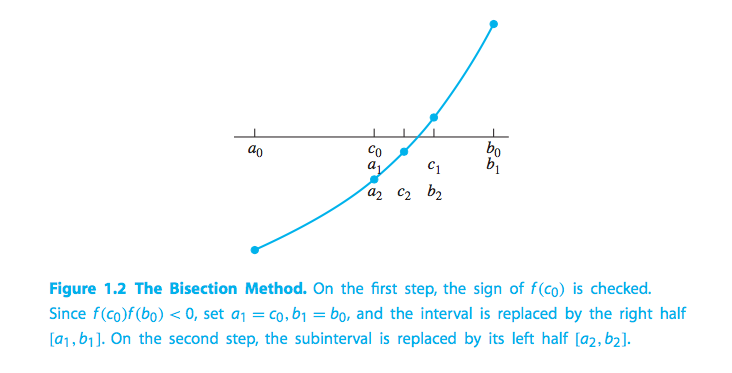

In [20]:
Image(filename='Images/01_1.png')

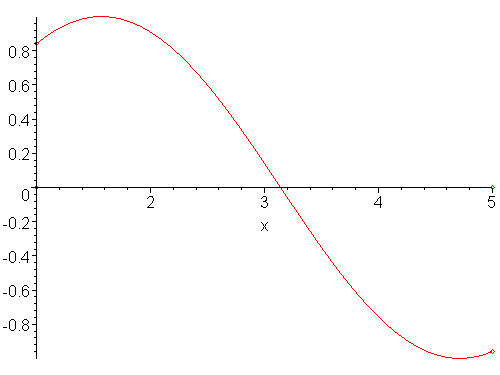

In [21]:
Image(filename='Images/bisection.gif')

In [22]:
def bisection_df(f, a, b, max_iter, k):
    TOL=10**(-k)
    if f(a) * f(b) >= 0: 
        print("You have not assumed right a and b") 
        return -1
    x = a # Initialize result 
    iteration=[]
    root=[]
    fvalue=[]
    lower=[]
    upper=[]
    ssign=[]
    s=2
    iter=0
    while s<max_iter and abs(b-a)>TOL:
        # Find the middle point between a and b 
        x = (a + b)/2
        iteration.append(iter)
        root.append(round(float(x),k))
        lower.append(round(float(a),k))
        upper.append(round(float(b),k))
        fvalue.append(round(float(f(x)),k))
        ssign.append(np.sign(f(a)*f(b)))
        # Check if the above found point is root 
        if abs(f(x)) < TOL: #fx == 0: 
            break
        # Decide the side to repeat the steps 
        elif f(x) * f(a) < 0: 
            b = x 
        else: 
            a = x 
        s+=1
        iter+=1
    print(f'Approximate_Root: {x}\nIterations: {iter}')
    df=pd.DataFrame(
    {'Iteration': iteration,
     'Approximate_Root': root,
     'Value': fvalue,
     'Lower': lower,
     'Upper': upper,
     'Sign': ssign
    })
    for c in df.columns:
        if c!='Iteration':
            df[c] = pd.to_numeric(df[c], errors='coerce') 
    df.set_index('Iteration', inplace=True)
    return df

If $[a,b]$ is the starting interval, then after $n$ bisection steps, the bisected interval $[a_n,b_n]$ has length $(b - a)/2^n$ and the approximate root $x_n = (a_n + b_n)/2$ has **error** $e_n = |x_n - r|$ to be bounded by:

$$e_n < \frac{(b - a)}{2^{n+1}}.$$

A solution to the Bisection Method is said **correct within $p$ decimal places** if the error is:

$$e_n < \frac{10^{−p}}{2}.$$

Therefore, the **minimum number of bisection steps** $N$ to reach a correct within $p$ decimal places solution is:

$$N = \frac{p + \log (b - a)}{\log 2} = \frac{p + \log (b - a)}{0.301}.$$

In [23]:
def iterations_for_p_correct_root(p):
    return math.floor(math.log((b-a)/(0.5*(10**(-p))), 2.0)-1)

In [24]:
a,b=0,1
p=6
iterations_for_p_correct_root(p)

19

### <span style="color:#19bfc2">EXAMPLE 1.1</span>

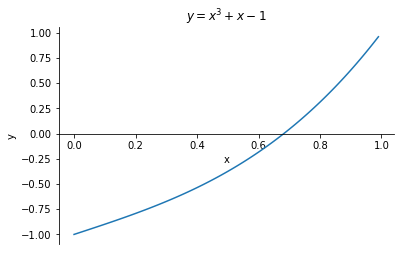

In [25]:
f=lambda x:x**3+x-1
a,b,h=0,1,0.01

ti=r'$y = x^3+x-1$'
x = np.arange(a,b,h)

fig = plt.figure()  
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
# ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero') 
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
p=plt.plot(x,f(x))
plt.xlabel('x')
plt.ylabel('y') 
plt.title(ti)
plt.show()

In [26]:
f=lambda x:x**3+x-1

a=0
b=1
max_iter=100
k=4

df=bisection_df(f,a,b,max_iter,k)
df

Approximate_Root: 0.68231201171875
Iterations: 13


Approximate_Root   Value   Lower   Upper  Sign
Iteration                                                
0                    0.5000 -0.3750  0.0000  1.0000  -1.0
1                    0.7500  0.1719  0.5000  1.0000  -1.0
2                    0.6250 -0.1309  0.5000  0.7500  -1.0
3                    0.6875  0.0125  0.6250  0.7500  -1.0
4                    0.6562 -0.0611  0.6250  0.6875  -1.0
5                    0.6719 -0.0248  0.6562  0.6875  -1.0
6                    0.6797 -0.0063  0.6719  0.6875  -1.0
7                    0.6836  0.0030  0.6797  0.6875  -1.0
8                    0.6816 -0.0016  0.6797  0.6836  -1.0
9                    0.6826  0.0007  0.6816  0.6836  -1.0
10                   0.6821 -0.0005  0.6816  0.6826  -1.0
11                   0.6824  0.0001  0.6821  0.6826  -1.0
12                   0.6823 -0.0002  0.6821  0.6824  -1.0
13                   0.6823 -0.0000  0.6823  0.6824  -1.0

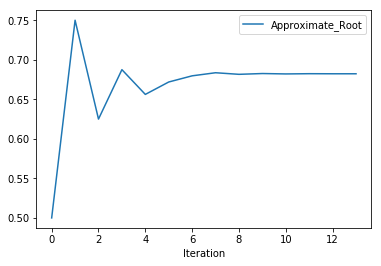

In [27]:
df = df.reset_index()
ic=iterations_for_p_correct_root(k)
df=df.loc[df["Iteration"]<ic+3]
_=df.plot(x="Iteration",y="Approximate_Root",kind="line")

### <span style="color:#19bfc2">EXAMPLE 1.2</span>

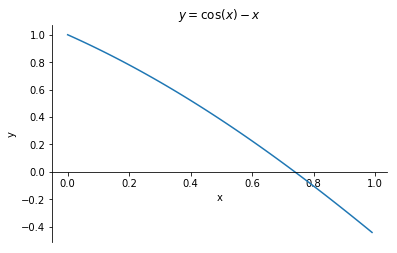

In [28]:
f=lambda x:np.cos(x)-x
a,b,h=0,1,0.01

ti=r'$y = \cos(x) - x$'
x = np.arange(a,b,h)

fig = plt.figure()  
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
# ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero') 
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
p=plt.plot(x,f(x))
plt.xlabel('x')
plt.ylabel('y') 
plt.title(ti)
plt.show()

In [29]:
f=lambda x:np.cos(x)-x

a=0
b=1
max_iter=100
k=6

df=bisection_df(f,a,b,max_iter,k)
df

Approximate_Root: 0.7390851974487305
Iterations: 19


Approximate_Root     Value     Lower     Upper  Sign
Iteration                                                      
0                  0.500000  0.377583  0.000000  1.000000  -1.0
1                  0.750000 -0.018311  0.500000  1.000000  -1.0
2                  0.625000  0.185963  0.500000  0.750000  -1.0
3                  0.687500  0.085335  0.625000  0.750000  -1.0
4                  0.718750  0.033879  0.687500  0.750000  -1.0
5                  0.734375  0.007875  0.718750  0.750000  -1.0
6                  0.742188 -0.005196  0.734375  0.750000  -1.0
7                  0.738281  0.001345  0.734375  0.742188  -1.0
8                  0.740234 -0.001924  0.738281  0.742188  -1.0
9                  0.739258 -0.000289  0.738281  0.740234  -1.0
10                 0.738770  0.000528  0.738281  0.739258  -1.0
11                 0.739014  0.000120  0.738770  0.739258  -1.0
12                 0.739136 -0.000085  0.739014  0.739258  -1.0
13                 0.739075  0.000017  0.739014  0.739136  -1.0
14                 0.739105 -0.000034  0.739075  0.739136  -1.0
15                 0.739090 -0.000008  0.739075  0.739105  -1.0
16                 0.739082  0.000005  0.739075  0.739090  -1.0
17                 0.739086 -0.000002  0.739082  0.739090  -1.0
18                 0.739084  0.000001  0.739082  0.739086  -1.0
19                 0.739085 -0.000000  0.739084  0.739086  -1.0

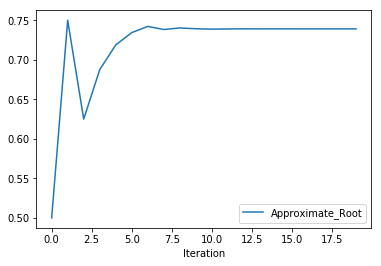

In [30]:
df = df.reset_index()
ic=iterations_for_p_correct_root(k)
df=df.loc[df["Iteration"]<ic+3]
_=df.plot(x="Iteration",y="Approximate_Root",kind="line")

### <span style="color:#19bfc2">EXERCISE 1.1.1.c</span>

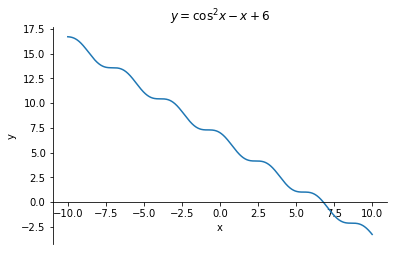

In [31]:
f=lambda x:(np.cos(x))**2+6-x
a,b,h=-10,10,0.01

ti=r'$y = \cos^2x -x + 6$'
x = np.arange(a,b,h)

fig = plt.figure()  
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
# ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero') 
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
p=plt.plot(x,f(x))
plt.xlabel('x')
plt.ylabel('y') 
plt.title(ti)
plt.show()

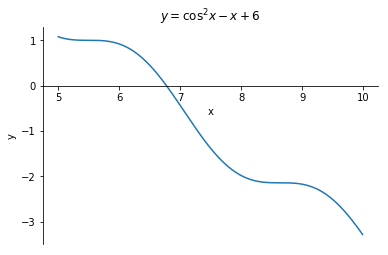

In [32]:
f=lambda x:(np.cos(x))**2+6-x
a,b,h=5,10,0.01

ti=r'$y = \cos^2x -x + 6$'
x = np.arange(a,b,h)

fig = plt.figure()  
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
# ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero') 
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
p=plt.plot(x,f(x))
plt.xlabel('x')
plt.ylabel('y') 
plt.title(ti)
plt.show()

In [33]:
f=lambda x:(np.cos(x))**2+6-x

a=5
b=10
max_iter=100
k=6

df=bisection_df(f,a,b,max_iter,k)
df

Approximate_Root: 6.776092052459717
Iterations: 20


Approximate_Root     Value     Lower      Upper  Sign
Iteration                                                       
0                  7.500000 -1.379844  5.000000  10.000000  -1.0
1                  6.250000  0.748899  5.000000   7.500000  -1.0
2                  6.875000 -0.186217  6.250000   7.500000  -1.0
3                  6.562500  0.361491  6.250000   6.875000  -1.0
4                  6.718750  0.103231  6.562500   6.875000  -1.0
5                  6.796875 -0.038343  6.718750   6.875000  -1.0
6                  6.757812  0.033332  6.718750   6.796875  -1.0
7                  6.777344 -0.002296  6.757812   6.796875  -1.0
8                  6.767578  0.015572  6.757812   6.777344  -1.0
9                  6.772461  0.006652  6.767578   6.777344  -1.0
10                 6.774902  0.002181  6.772461   6.777344  -1.0
11                 6.776123 -0.000056  6.774902   6.777344  -1.0
12                 6.775513  0.001063  6.774902   6.776123  -1.0
13                 6.775818  0.000503  6.775513   6.776123  -1.0
14                 6.775970  0.000223  6.775818   6.776123  -1.0
15                 6.776047  0.000084  6.775970   6.776123  -1.0
16                 6.776085  0.000014  6.776047   6.776123  -1.0
17                 6.776104 -0.000021  6.776085   6.776123  -1.0
18                 6.776094 -0.000004  6.776085   6.776104  -1.0
19                 6.776090  0.000005  6.776085   6.776094  -1.0
20                 6.776092  0.000000  6.776090   6.776094  -1.0

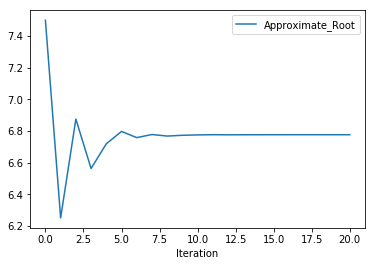

In [34]:
df = df.reset_index()
ic=iterations_for_p_correct_root(k)
df=df.loc[df["Iteration"]<ic+3]
_=df.plot(x="Iteration",y="Approximate_Root",kind="line")

### 1.2 Fixed-Point Iteration

Let $g$ be a real-valued function defined on an open interval $I$. A point $r \in I$ such that $g(r) = r$ is called a **fixed point** of $g$ (in $I$).

*Theorem*. If $g$ is continuously differentiable on $I$ and $g$ has a fixed point $r \in I$ such that $S = |g'(r)| < 1$, then for any $x_0$ sufficiently close to $r$ in $I$, the sequence $\{\!x_n\!\}$ defined by the **iteration** $x_{n+1} = g(x_n)$, for $n = 0, 1, 2, \ldots$, **converges to $r$ linearly with rate $S$**, meaning that $\lim_{n \to \infty} \frac{|r-x_{n+1}|}{|r-xn|} = S$ ($<1$).

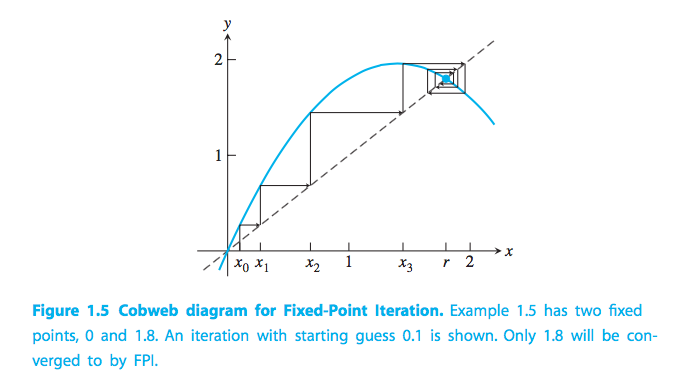

In [35]:
Image(filename='Images/01_2.png')

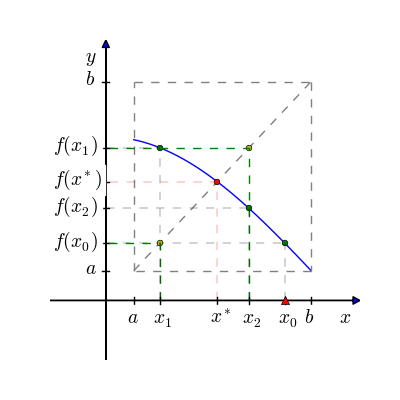

In [36]:
Image(filename='Images/Fixed_point_anime.gif',width=1000)

In [37]:
def fixed_point_iteration_df(g, x, k, max_iter):
    err = 1
    iterations = 0
    iteration = [0]
    root = [x]
#     print(f'x{iterations} = {x: 0.8f}')
    TOL=10**(-k)
    s=0
    while err > TOL and s<max_iter+1:
        x_new = g(x)
        err = abs(x_new - x)
        x = x_new
        iteration.append(iterations)
        root.append(round(float(x),k))
        iterations += 1
        s+=1
#         print(f'x{iterations} = {x: 0.8f}')
    print(f'Approximate_Root: {x}\nIterations: {iterations}')
    pd.set_option('precision', k)
    df=pd.DataFrame(
        {r'$$i$$': iteration,
         '$$x_i$$': root})
    error=[]
    S=['NaN']
    r=df.iloc[-1]['$$x_i$$']
    iteration=df[r'$$i$$'].tolist()
    root=df['$$x_i$$'].tolist()
    for i in range(len(df)):
        e=abs(df.iloc[i]['$$x_i$$']-r)
        error.append(e)
        if i>0:
            e1=abs(df.iloc[i]['$$x_i$$']-r)
            e2=abs(df.iloc[i-1]['$$x_i$$']-r)
            eel=e1/e2
            S.append(eel)  
    df[r'$$e_i =|x_i-r|$$']=error
    df[r'$$e_i/e_{i-1}$$']=S
    df.set_index(r'$$i$$', inplace=True)
    return df

### <span style="color:#19bfc2">EXAMPLE pp. 32-33</span>

For the roots of the equation $x^3 + x - 1 = 0$, let us consicer three cases.

**Case I**:<br/>
Since $x^3 + x - 1 = 0 \mbox{ when } 1 - x^3 = x$, a fixed point of $g(x) = 1 - x^3$ is a root of $f(x) = x^3 + x - 1$.

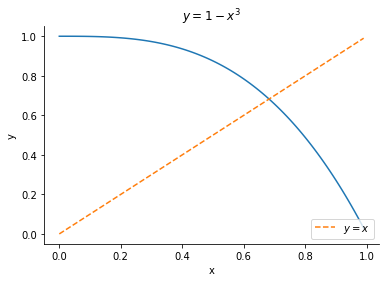

Approximate_Root: 1.0
Iterations: 13
S = 0.75


$$x_i$$  $$e_i =|x_i-r|$$ $$e_i/e_{i-1}$$
$$i$$                                              
0      0.50000000        0.50000000             NaN
0      0.87500000        0.12500000            0.25
1      0.33007812        0.66992188        5.359375
2      0.96403747        0.03596253     0.053681677
3      0.10405419        0.89594581       24.913314
4      0.99887338        0.00112662    0.0012574644
5      0.00337606        0.99662394        884.6141
6      0.99999996        0.00000004     4.01355e-08
7      0.00000012        0.99999988        24999997
8      1.00000000        0.00000000               0
9      0.00000000        1.00000000             inf
10     1.00000000        0.00000000               0
11     0.00000000        1.00000000             inf
12     1.00000000        0.00000000               0

In [38]:
g=lambda x: 1 - x**3
a,b,h=0,1,0.01

ti=r'$y = 1 - x^3$'
x = np.arange(a,b,h)
i=lambda x:x

fig = plt.figure()  
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
p=plt.plot(x,g(x))
q=plt.plot(x,i(x),'--',label="$y = x$")
ax.legend(loc='lower right')
plt.xlabel('x')
plt.ylabel('y') 
plt.title(ti)
plt.show()

df=fixed_point_iteration_df(g, 0.5, 8, 12)

x = symbols('x')
gd=(1 - x**3).diff(x)
gd=nsimplify(gd.evalf())
gd=lambdify(x,gd,'numpy')
print("S =",abs(gd(0.5)))

df

**Case II**:<br/>
Since $x^3 + x - 1 = 0 \mbox{ when } \sqrt[3]{1 - x} = x$, a fixed point of $g(x) = \sqrt[3]{1 - x}$ is a root of $f(x) = x^3 + x - 1$.

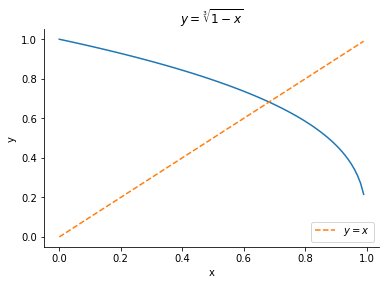

Approximate_Root: 0.6823680664498976
Iterations: 25
S = 0.5291336839893998


$$x_i$$  $$e_i =|x_i-r|$$ $$e_i/e_{i-1}$$
$$i$$                                           
0       0.5000        1.8240e-01             NaN
0       0.7937        1.1130e-01          0.6102
1       0.5909        9.1500e-02          0.8221
2       0.7424        6.0000e-02          0.6557
3       0.6363        4.6100e-02          0.7683
4       0.7138        3.1400e-02          0.6811
5       0.6590        2.3400e-02          0.7452
6       0.6986        1.6200e-02          0.6923
7       0.6704        1.2000e-02          0.7407
8       0.6907        8.3000e-03          0.6917
9       0.6763        6.1000e-03          0.7349
10      0.6866        4.2000e-03          0.6885
11      0.6792        3.2000e-03          0.7619
12      0.6845        2.1000e-03          0.6563
13      0.6807        1.7000e-03          0.8095
14      0.6835        1.1000e-03          0.6471
15      0.6815        9.0000e-04          0.8182
16      0.6829        5.0000e-04          0.5556
17      0.6819        5.0000e-04               1
18      0.6826        2.0000e-04             0.4
19      0.6821        3.0000e-04             1.5
20      0.6825        1.0000e-04          0.3333
21      0.6822        2.0000e-04               2
22      0.6824        0.0000e+00               0
23      0.6823        1.0000e-04             inf
24      0.6824        0.0000e+00               0

In [39]:
g=lambda x: (1 - x)**(1/3)
a,b,h=0,1,0.01

ti=r'$y = \sqrt[3]{1 - x}$'
x = np.arange(a,b,h)
i=lambda x:x

fig = plt.figure()  
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
p=plt.plot(x,g(x))
q=plt.plot(x,i(x),'--',label="$y = x$")
ax.legend(loc='lower right')
plt.xlabel('x')
plt.ylabel('y') 
plt.title(ti)
plt.show()

df=fixed_point_iteration_df(g, 0.5, 4, 100)

x = symbols('x')
gd=((1 - x)**(1/3)).diff(x)
gd=nsimplify(gd.evalf())
gd=lambdify(x,gd,'numpy')
print("S =",abs(gd(0.5)))

df

**Case III**:<br/>
Since $x^3 + x - 1 = 0 \mbox{ when } \frac{1 + 2x^3}{1 + 3x^2} = x$, a fixed point of $g(x) = \frac{1 + 2x^3}{1 + 3x^2}$ is a root of $f(x) = x^3 + x - 1$.

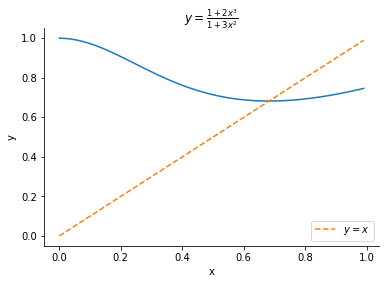

Approximate_Root: 0.6823278038280193
Iterations: 5
S = 0.3673469387755105


$$x_i$$  $$e_i =|x_i-r|$$ $$e_i/e_{i-1}$$
$$i$$                                              
0      0.50000000        0.18232780             NaN
0      0.71428571        0.03195791      0.17527722
1      0.68317972        0.00085192     0.026657563
2      0.68232842        0.00000062   0.00072776787
3      0.68232780        0.00000000               0
4      0.68232780        0.00000000             NaN

In [40]:
g=lambda x: (1 + 2*x**3)/(1 + 3*x**2)
a,b,h=0,1,0.01

ti=r'$y = \frac{1 + 2x^3}{1 + 3x^2}$'
x = np.arange(a,b,h)
i=lambda x:x

fig = plt.figure()  
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
p=plt.plot(x,g(x))
q=plt.plot(x,i(x),'--',label="$y = x$")
ax.legend(loc='lower right')
plt.xlabel('x')
plt.ylabel('y') 
plt.title(ti)
plt.show()

df=fixed_point_iteration_df(g, 0.5, 8, 100)

x = symbols('x')
gd=((1 + 2*x**3)/(1 + 3*x**2)).diff(x)
gd=nsimplify(gd.evalf())
gd=lambdify(x,gd,'numpy')
print("S =",abs(gd(0.5)))

df

### <span style="color:#19bfc2">EXAMPLE 1.3</span>

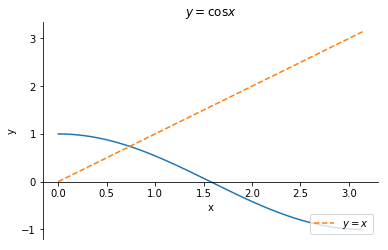

Approximate_Root: 0.7390851372357778
Iterations: 45
S = 0.479425538604203


$$x_i$$  $$e_i =|x_i-r|$$ $$e_i/e_{i-1}$$
$$i$$                                              
0      0.50000000    2.39085140e-01             NaN
0      0.87758256    1.38497420e-01      0.57928075
1      0.63901249    1.00072650e-01      0.72255967
2      0.80268510    6.35999600e-02      0.63553788
3      0.69477803    4.43071100e-02      0.69665311
4      0.76819583    2.91106900e-02      0.65702074
5      0.71916545    1.99196900e-02      0.68427406
6      0.75235576    1.32706200e-02      0.66620615
7      0.73008106    9.00408000e-03      0.67849731
8      0.74512034    6.03520000e-03      0.67027392
9      0.73500631    4.07883000e-03      0.67584007
10     0.74182652    2.74138000e-03       0.6720996
11     0.73723573    1.84941000e-03      0.67462738
12     0.74032965    1.24451000e-03      0.67292272
13     0.73824624    8.38900000e-04      0.67408056
14     0.73964996    5.64820000e-04      0.67328645
15     0.73870454    3.80600000e-04      0.67384299
16     0.73934145    2.56310000e-04      0.67343668
17     0.73891245    1.72690000e-04      0.67375444
18     0.73920144    1.16300000e-04      0.67346112
19     0.73900678    7.83600000e-05      0.67377472
20     0.73913791    5.27700000e-05      0.67343032
21     0.73904958    3.55600000e-05      0.67386773
22     0.73910908    2.39400000e-05      0.67322835
23     0.73906900    1.61400000e-05      0.67418546
24     0.73909600    1.08600000e-05      0.67286245
25     0.73907781    7.33000000e-06      0.67495396
26     0.73909006    4.92000000e-06      0.67121419
27     0.73908181    3.33000000e-06      0.67682927
28     0.73908737    2.23000000e-06      0.66966967
29     0.73908363    1.51000000e-06      0.67713004
30     0.73908615    1.01000000e-06      0.66887417
31     0.73908445    6.90000000e-07      0.68316832
32     0.73908559    4.50000000e-07      0.65217391
33     0.73908482    3.20000000e-07      0.71111111
34     0.73908534    2.00000000e-07           0.625
35     0.73908499    1.50000000e-07            0.75
36     0.73908523    9.00000000e-08             0.6
37     0.73908507    7.00000000e-08      0.77777778
38     0.73908518    4.00000000e-08      0.57142857
39     0.73908510    4.00000000e-08               1
40     0.73908515    9.99999994e-09            0.25
41     0.73908512    2.00000000e-08               2
42     0.73908514    0.00000000e+00               0
43     0.73908513    1.00000001e-08             inf
44     0.73908514    0.00000000e+00               0

In [41]:
# import sympy as sympy

g0=lambda x: math.cos(x)
g = lambda x: cos(x)  #sympy.
g1 = np.vectorize(g)
a,b,h=0,math.pi,0.01

ti=r'$y = \cos x$'
x = np.arange(a,b,h)
i=lambda x:x

fig = plt.figure()  
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
# ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero') 
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
p=plt.plot(x,g1(x))
q=plt.plot(x,i(x),'--',label="$y = x$")
ax.legend(loc='lower right')
plt.xlabel('x')
plt.ylabel('y') 
plt.title(ti)
plt.show()

df=fixed_point_iteration_df(g0, 0.5, 8, 100)

x = symbols('x')  #sympy.
gd=diff(g(x),x)
gd=nsimplify(gd.evalf())
gd=lambdify(x,gd,'numpy')
print("S =",abs(gd(0.5)))

df

### <span style="color:#19bfc2">EXAMPLE 1.4</span>

To find a root of $\cos x = \sin x$, one needs to find the fixed points of $g(x) = x + \cos x - \sin x$.

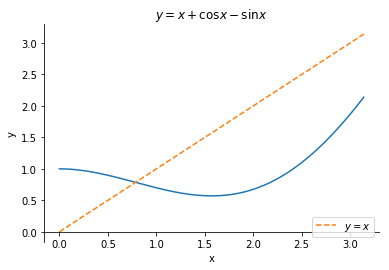

Approximate_Root: 0.7853981614937313
Iterations: 22
S = 0.0


$$x_i$$  $$e_i =|x_i-r|$$ $$e_i/e_{i-1}$$
$$i$$                                              
0      0.00000000    7.85398160e-01             NaN
0      1.00000000    2.14601840e-01      0.27323955
1      0.69883132    8.65668400e-02      0.40338349
2      0.82110248    3.57043200e-02        0.412448
3      0.77061968    1.47784800e-02      0.41391294
4      0.79151885    6.12069000e-03      0.41416235
5      0.78286295    2.53521000e-03       0.4142033
6      0.78644828    1.05012000e-03      0.41421421
7      0.78496319    4.34970000e-04       0.4142098
8      0.78557833    1.80170000e-04      0.41421247
9      0.78532353    7.46300000e-05       0.4142199
10     0.78542908    3.09200000e-05       0.4143106
11     0.78538536    1.28000000e-05      0.41397154
12     0.78540347    5.31000000e-06      0.41484375
13     0.78539597    2.19000000e-06      0.41242938
14     0.78539907    9.10000000e-07      0.41552511
15     0.78539779    3.70000000e-07      0.40659341
16     0.78539832    1.60000000e-07      0.43243243
17     0.78539810    6.00000000e-08           0.375
18     0.78539819    3.00000000e-08             0.5
19     0.78539815    9.99999994e-09      0.33333333
20     0.78539817    1.00000001e-08               1
21     0.78539816    0.00000000e+00               0

In [42]:
g0=lambda x: x+math.cos(x)-math.sin(x)
g = lambda x: x+cos(x)-sin(x) #x+sympy.cos(x)-sympy.sin(x)
g1 = np.vectorize(g)
a,b,h=0,math.pi,0.01

ti=r'$y = x + \cos x - \sin x$'
x = np.arange(a,b,h)
i=lambda x:x

fig = plt.figure()  
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
# ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero') 
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
p=plt.plot(x,g1(x))
q=plt.plot(x,i(x),'--',label="$y = x$")
ax.legend(loc='lower right')
plt.xlabel('x')
plt.ylabel('y') 
plt.title(ti)
plt.show()

df=fixed_point_iteration_df(g0, 0, 8, 100)

x = symbols('x')  #sympy.
gd=diff(g(x),x)
gd=nsimplify(gd.evalf())
gd=lambdify(x,gd,'numpy')
print("S =",abs(gd(0)))

df

The fixed points of $g(x) = 2.8x − x^2$ on $[0.2]$ can be determined by solving $g(x) = x$ by hand in order to find two of them $r_0 = 0$ and $r_1 = 1.8$.

### <span style="color:#19bfc2">EXAMPLE 1.5</span>

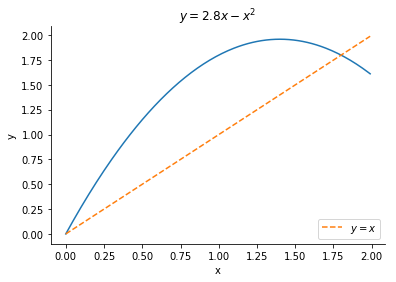

Approximate_Root: 1.800000004341678
Iterations: 82
S = 0.8000000000000003


$$x_i$$  $$e_i =|x_i-r|$$ $$e_i/e_{i-1}$$
$$i$$                                              
0      0.10000000    1.70000000e+00             NaN
0      0.27000000    1.53000000e+00             0.9
1      0.68310000    1.11690000e+00            0.73
2      1.44605439    3.53945610e-01          0.3169
3      1.95787899    1.57878990e-01      0.44605438
4      1.64877103    1.51228970e-01      0.95787901
5      1.89811298    9.81129800e-02      0.64877107
6      1.71188346    8.81165400e-02      0.89811297
7      1.86272870    6.27287000e-02      0.71188338
8      1.74588215    5.41178500e-02       0.8627287
9      1.84036554    4.03655400e-02      0.74588218
10     1.76607819    3.39218100e-02      0.84036557
11     1.82598676    2.59867600e-02      0.76607823
12     1.77853528    2.14647200e-02      0.82598677
13     1.81671104    1.67110400e-02       0.7785352
14     1.78635191    1.36480900e-02      0.81671099
15     1.81073220    1.07322000e-02      0.78635179
16     1.79129906    8.70094000e-03      0.81073219
17     1.80688505    6.88505000e-03      0.79129956
18     1.79444456    5.55544000e-03      0.80688448
19     1.80441349    4.41349000e-03      0.79444472
20     1.79644973    3.55027000e-03      0.80441329
21     1.80282761    2.82761000e-03      0.79644928
22     1.79772991    2.27009000e-03      0.80282995
23     1.80181092    1.81092000e-03      0.79773049
24     1.79854799    1.45201000e-03      0.80180792
25     1.80115950    1.15950000e-03      0.79854822
26     1.79907105    9.28950000e-04      0.80116429
27     1.80074229    7.42290000e-04      0.79906346
28     1.79940561    5.94390000e-04      0.80075173
...           ...               ...             ...
52     1.79999719    2.81000000e-06       0.8005698
53     1.80000224    2.24000000e-06      0.79715302
54     1.79999820    1.80000000e-06      0.80357143
55     1.80000144    1.44000000e-06             0.8
56     1.79999885    1.15000000e-06      0.79861111
57     1.80000092    9.20000000e-07             0.8
58     1.79999926    7.40000000e-07      0.80434783
59     1.80000059    5.90000000e-07       0.7972973
60     1.79999953    4.70000000e-07      0.79661017
61     1.80000038    3.80000000e-07      0.80851064
62     1.79999970    3.00000000e-07      0.78947368
63     1.80000024    2.40000000e-07             0.8
64     1.79999981    1.90000000e-07      0.79166667
65     1.80000015    1.50000000e-07      0.78947368
66     1.79999988    1.20000000e-07             0.8
67     1.80000010    1.00000000e-07      0.83333333
68     1.79999992    8.00000000e-08             0.8
69     1.80000006    5.99999999e-08            0.75
70     1.79999995    5.00000001e-08      0.83333334
71     1.80000004    4.00000000e-08             0.8
72     1.79999997    3.00000000e-08            0.75
73     1.80000003    3.00000000e-08               1
74     1.79999998    2.00000001e-08      0.66666667
75     1.80000002    1.99999999e-08      0.99999999
76     1.79999999    9.99999994e-09             0.5
77     1.80000001    9.99999994e-09               1
78     1.79999999    9.99999994e-09               1
79     1.80000001    9.99999994e-09               1
80     1.79999999    9.99999994e-09               1
81     1.80000000    0.00000000e+00               0

[83 rows x 3 columns]

In [43]:
g=lambda x: 2.8*x-x**2
a,b,h=0,2,0.01

ti=r'$y = 2.8x - x^2$'
x = np.arange(a,b,h)
i=lambda x:x

fig = plt.figure()  
ax = fig.add_subplot(1, 1, 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
p=plt.plot(x,g(x))
q=plt.plot(x,i(x),'--',label="$y = x$")
ax.legend(loc='lower right')
plt.xlabel('x')
plt.ylabel('y') 
plt.title(ti)
plt.show()

df=fixed_point_iteration_df(g, 0.1, 8, 100)

x = symbols('x')
gd=(2.8*x-x**2).diff(x)
gd=nsimplify(gd.evalf())
gd=lambdify(x,gd,'numpy')
print("S =",abs(gd(1.8)))

df

### 1.3 Limits of Accuracy

### <span style="color:#19bfc2">EXAMPLE 1.7</span>

In [44]:
f = lambda x : x**3 - 2*x**2 + (4/3)*x - 8/27
print(solve(f(x), x))
bisection_df(f,0,1,20,14)

[0.666666666666667]
Approximate_Root: 0.66668701171875
Iterations: 13


Approximate_Root           Value       Lower       Upper  Sign
Iteration                                                                
0                0.50000000 -4.62962963e-03  0.00000000  1.00000000  -1.0
1                0.75000000  5.78703704e-04  0.50000000  1.00000000  -1.0
2                0.62500000 -7.23379630e-05  0.50000000  0.75000000  -1.0
3                0.68750000  9.04224537e-06  0.62500000  0.75000000  -1.0
4                0.65625000 -1.13028067e-06  0.62500000  0.68750000  -1.0
5                0.67187500  1.41285080e-07  0.65625000  0.68750000  -1.0
6                0.66406250 -1.76606400e-08  0.65625000  0.67187500  -1.0
7                0.66796875  2.20758000e-09  0.66406250  0.67187500  -1.0
8                0.66601562 -2.75950000e-10  0.66406250  0.66796875  -1.0
9                0.66699219  3.44900000e-11  0.66601562  0.66796875  -1.0
10               0.66650391 -4.31000000e-12  0.66601562  0.66699219  -1.0
11               0.66674805  5.40000000e-13  0.66650391  0.66699219  -1.0
12               0.66662598 -7.00000000e-14  0.66650391  0.66674805  -1.0
13               0.66668701  1.00000000e-14  0.66662598  0.66674805  -1.0

Assume that function $f$ has a root $r$, meaning that $f(r) = 0$. Assume that $x_a$ is an approximation to $r$. Then the **backward error** of the approximation $x_a$ is defined as $|f(x_a)|$ and the **forward error** as $|r − x_a|$.

### <span style="color:#19bfc2">EXAMPLE 1.8</span>

In [45]:
f = lambda x: np.sin(x) - x
x = symbols('x')
fs = sin(x) - x  #sympy.

root = optimize.root(f, np.array([0,0,0]))
print(root.x)
rs=list(root.x)
print(Counter(rs))
r=list(Counter(rs).keys())[0]
m=list(Counter(rs).values())[0]
print(r,'is root of',fs,'with multiplicity',m)

xa=0.001
be=abs(f(xa))
fe=abs(r-xa)
print('The backward error of the approximate root',xa,'is',be)
print('The forward error of the approximate root',xa,'is',fe)

[0. 0. 0.]
Counter({0.0: 3})
0.0 is root of -x + sin(x) with multiplicity 3
The backward error of the approximate root 0.001 is 1.6666665833900418e-10
The forward error of the approximate root 0.001 is 0.001


#### Sensitivity Formula for Roots

Let $r$ be a root of $f(x)$ and $r + \Delta r$ a root of $f(x) + \epsilon g(x)$. If $\epsilon \ll f'(x)$, then

$$\Delta r \approx - \frac{\epsilon g(r)}{f'(r)}$$

**Error Magnification Factor:**:

$${\mbox{ EMF }} = \big|\frac{\Delta r / r}{\epsilon g(r) / g(r)}\big| = \frac{|g(r)|}{|r f'(r)|}$$

### <span style="color:#19bfc2">EXAMPLE 1.9</span>

In [46]:
x = Symbol('x')
def f(x):
    p=1
    for i in range (1, 7):
        p*=(x-i)
    return p 
# f(x).evalf()
fd=diff(f(x),x)  #sympy.
# print(diff(lambdify(x,f,'numpy')))
g = lambda x: x**7
e = -10**(-6)
P = lambda x: f(x)+e*g(x)
P(x)

-1.0e-6*x**7 + (x - 6)*(x - 5)*(x - 4)*(x - 3)*(x - 2)*(x - 1)

In [47]:
# Estimate the largest root of P(x)

r=6
dr=-e*(g(r))/fd.evalf(subs={x: r})
fdr=fd.evalf(subs={x: r})
ar=r+dr
emf=abs(g(r))/abs(r*fdr)
# print('gr',g(r),'rdr',r*dr)
print('The estimated largest root of P(x) is',ar)
print('The computed by sympy largest root of P(x) is',solve(P(x), x)[5])
print('The error magification factor is',emf)

The estimated largest root of P(x) is 6.00233280000000
The computed by sympy largest root of P(x) is 6.00232675474645
The error magification factor is 388.800000000000


#### Wilkinson polynomial

In [48]:
x = Symbol('x')
def W(x):
    p=1
    for i in range(1, 21):
        p*=(x-i)
    return p
W(x)

(x - 20)*(x - 19)*(x - 18)*(x - 17)*(x - 16)*(x - 15)*(x - 14)*(x - 13)*(x - 12)*(x - 11)*(x - 10)*(x - 9)*(x - 8)*(x - 7)*(x - 6)*(x - 5)*(x - 4)*(x - 3)*(x - 2)*(x - 1)

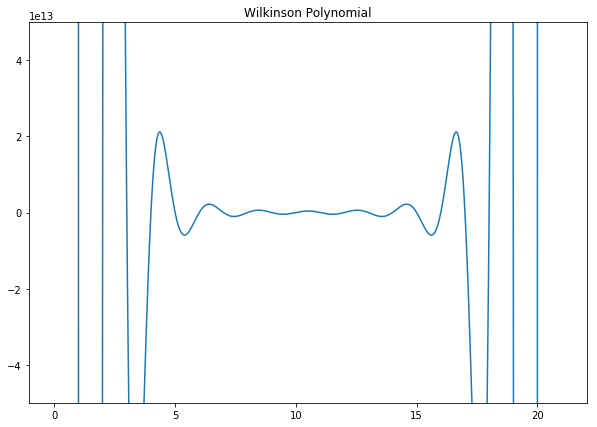

In [49]:
def wilkinson(x):
    p = np.prod(np.array([x - i for i in range(1, 21)]))
    return p
Wnp = np.vectorize(wilkinson)
plt.figure(figsize=(10,7))  
x = np.linspace(0, 21, 1000)
plt.plot(x, Wnp(x))
plt.ylim([-5e13, 5e13])
plt.title("Wilkinson Polynomial")
plt.show()

In [50]:
x = Symbol('x')
W = 1
for i in range(1, 21):
    W = W * (x-i)
P,d = poly_from_expr(W.expand())
p = P.all_coeffs()
x = np.arange(1, 21)
print('The roots of the Wilinson polynomial:\n',x)

The roots of the Wilinson polynomial:
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


### <span style="color:#19bfc2">EXAMPLE 1.10</span>

In [51]:
x, e = symbols('x e')
def W(x):
    p=1
    for i in range (1, 21):
        p*=(x-i)
    return p
g = lambda x: -1672280820*x**15
We = lambda x: W(x)+e*g(x)
We(x)

-1672280820*e*x**15 + (x - 20)*(x - 19)*(x - 18)*(x - 17)*(x - 16)*(x - 15)*(x - 14)*(x - 13)*(x - 12)*(x - 11)*(x - 10)*(x - 9)*(x - 8)*(x - 7)*(x - 6)*(x - 5)*(x - 4)*(x - 3)*(x - 2)*(x - 1)

In [52]:
r=16
e=2**(-52)
Wd=diff(W(x),x)  #sympy.
Wd=lambdify(x,Wd,'numpy')
dr1=-e*g(r)/Wd(r)  #.evalf(subs={x: r})
dr1='%.2E' %dr1
dr1=round(float(dr1),4)
Wdr=Wd(r)  #fd.evalf(subs={x: r})
emf=abs(g(r))/abs(r*Wdr)
print('The estimated perturbed root of We(x) is',r+dr1)  #ar(r))

root = optimize.root(We,16.0136) #, np.array([0,0,0]))
rs=root.x[0]
print('The computed by scipy perturbed root of We(x) is',rs)
print('The error magification factor is','%.2E' %emf)

The estimated perturbed root of We(x) is 16.0136
The computed by scipy perturbed root of We(x) is 16.01358943073988
The error magification factor is 3.84E+12


### 1.4 Newton's Method

In **Newton’s Method**, also called the **Newton–Raphson Method**, to find a root of $f(x) = 0$, a starting guess $x_0$ is given, and the tangent line to the function $f$ at $x_0$ is drawn. The tangent line will approximately follow the function down to the $x$-axis toward the root. The intersection point of the line with the $x$-axis is an approximate root, but probably not exact if $f$ curves. Therefore, this step is iterated.

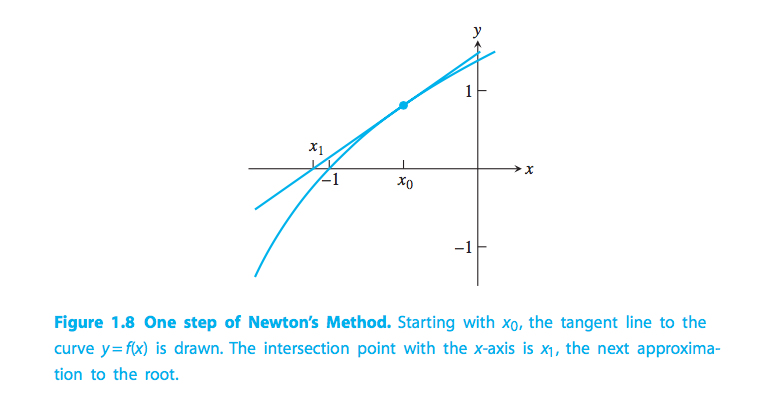

In [53]:
Image(filename='Images/01_3.png')

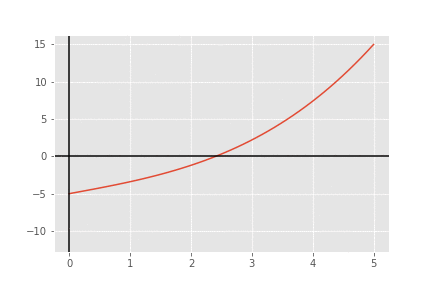

In [54]:
Image(filename='Images/newton.gif',width=1000)

The point-slope formula for the equation of a line passing from the point $(x_0,f(x_0))$ is $y − f(x_0) = f'(x_0)(x − x_0)$ and it intersects the $x$-axis (where $y = 0$), wnen $f'(x_0)(x − x_0) = 0 − f(x_0)$, i.e., at $x = x_0 - \frac{f(x_0)}{f'(x_0)}$. Therefore, the Newton's method iteration is:

$$x_0 = {\mbox{ initial guess }}$$<br/>
$$x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}, {\mbox{ for }} i = 0, 1, 2, \ldots$$

*Theorem*. Let $f$ be twice continuously differentiable and $f(r) = 0$. If $f'(r) \neq 0$, then Newton’s Method is locally and **quadratically convergent** to $r$, meaning by the latter that the error $e_i = |f(x_i) - r|$ at step $i$ is such that:

$$\lim_{i \to \infty} \frac{e_{i+1}}{e_i^2} = M < \infty,$$

where

$$M = \frac{f''(r)}{2 f'(r)}.$$

In [55]:
def newton_df(f, Df, x, max_iter, k, m, type):
    x0 = x
    iteration=[0]
    root=[x0]
    iter=0
    for i in range(1, max_iter):
        if Df(x) == 0.0:
            break
        x = x - (m * f(x) / Df(x))
        Er = abs(x0-x)/abs(x0)
        tol=10**(-k)
        if Er > tol:
            iteration.append(i)
            root.append(round(float(x),k))
            iter+=1
        x0 = x
    print(f'Approximate_Root: {x}\nIterations: {iter}')
    if type==0:
        pd.set_option('precision', k)
        df=pd.DataFrame(
            {'Iteration': iteration,
             'Approximate_Root': root}) 
        df.set_index('Iteration', inplace=True)
        return df
    if type==1:
        error=[]
        M=['NaN']
        pd.set_option('precision', k)
        df=pd.DataFrame(
            {'Iteration': iteration,
             'Approximate_Root': root}) 
        r=df.iloc[-1]['Approximate_Root']
        iteration=df.Iteration.tolist()
        root=df.Approximate_Root.tolist()
        for i in range(len(df)):
            e=abs(df.iloc[i]['Approximate_Root']-r)
            error.append(e)
            if i>0:
                e1=abs(df.iloc[i]['Approximate_Root']-r)
                e2=abs(df.iloc[i-1]['Approximate_Root']-r)
                ee=e1/e2**2
                M.append(ee)  
        edf=pd.DataFrame(
        {r'$$i$$': iteration,
         '$$x_i$$': root,
         r'$$e_i =|x_i-r|$$': error,  
         r'$$e_i/e_{i-1}^2$$': M
        })
        edf.set_index(r'$$i$$', inplace=True)
        return edf
    if type==2:
        error=[]
        lM=['NaN']
        pd.set_option('precision', k)
        df=pd.DataFrame(
            {'Iteration': iteration,
             'Approximate_Root': root})
        r=df.iloc[-1]['Approximate_Root']
        iteration=df.Iteration.tolist()
        root=df.Approximate_Root.tolist()
        for i in range(len(df)):
            e=abs(df.iloc[i]['Approximate_Root']-r)
            error.append(e)
            if i>0:
                e1=abs(df.iloc[i]['Approximate_Root']-r)
                e2=abs(df.iloc[i-1]['Approximate_Root']-r)
                eel=e1/e2
                lM.append(eel)  
        edf=pd.DataFrame(
        {r'$$i$$': iteration,
         '$$x_i$$': root,
         r'$$e_i =|x_i-r|$$': error,  
         r'$$e_i/e_{i-1}$$': lM
        })
        edf.set_index(r'$$i$$', inplace=True)
        return edf

### <span style="color:#19bfc2">EXAMPLE 1.11</span>

In [56]:
f = lambda x: x**3 + x - 1
Df = lambda x: 3*x**2 + 1

x=-0.7
max_iter=100
k=8
m=1

newton_df(f,Df,x,max_iter,k,m,type=1)

Approximate_Root: 0.6823278038280193
Iterations: 6


$$x_i$$  $$e_i =|x_i-r|$$ $$e_i/e_{i-1}^2$$
$$i$$                                                
0     -0.70000000        1.38232780               NaN
1      0.12712551        0.55520229        0.29055554
2      0.95767812        0.27535032         0.8932707
3      0.73482779        0.05249999        0.69244941
4      0.68459177        0.00226397        0.82139532
5      0.68233217        0.00000437        0.85258974
6      0.68232780        0.00000000                 0

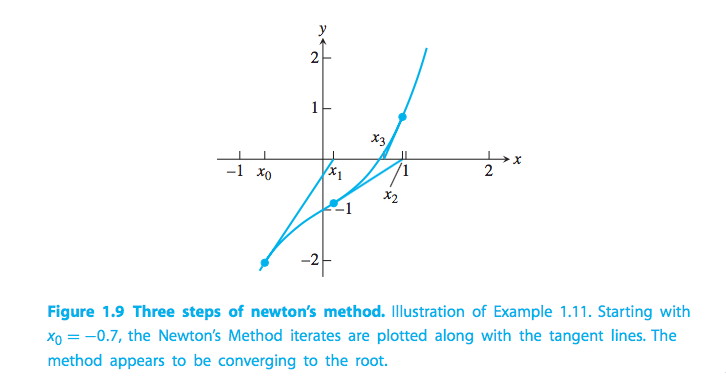

In [57]:
Image(filename='Images/01_4.png')

### <span style="color:#19bfc2">EXAMPLE 1.12</span>

In [58]:
f = lambda x: x**2 
Df = lambda x: 2*x

x=1.0
max_iter=100
k=8
m=1

newton_df(f,Df,x,max_iter,k,m,type=2)[:10]

Approximate_Root: 1.5777218104420236e-30
Iterations: 99


$$x_i$$  $$e_i =|x_i-r|$$ $$e_i/e_{i-1}$$
$$i$$                                              
0      1.00000000        1.00000000             NaN
1      0.50000000        0.50000000             0.5
2      0.25000000        0.25000000             0.5
3      0.12500000        0.12500000             0.5
4      0.06250000        0.06250000             0.5
5      0.03125000        0.03125000             0.5
6      0.01562500        0.01562500             0.5
7      0.00781250        0.00781250             0.5
8      0.00390625        0.00390625             0.5
9      0.00195312        0.00195312      0.49999872

*Theorem.* Assume that the $(m + 1)$-times continuously differentiable function $f$ on $[a,b]$ has a multiplicity $m > 1$ root at $r$. Then Newton’s Method is locally and **linearly convergent** to $r$, meaning by the latter that the error $e_i$ at step $i$ is such that: 

$$\lim_{i \to \infty} \frac{e_{i+1}}{e_i} = S < \infty,$$

where

$$S = \frac{m - 1}{m}.$$

### <span style="color:#19bfc2">EXAMPLE 1.14</span>

In [59]:
f = lambda x: math.sin(x) + (x**2)*math.cos(x) - x**2 - x
Df = lambda x: (-x**2)*math.sin(x) + (2*x)*math.cos(x) + math.cos(x) - 2*x - 1

x=1.0
max_iter=100
k=14
m=1

newton_df(f,Df,x,max_iter,k,m,type=2)

Approximate_Root: 1.9399409074817115e-08
Iterations: 45


$$x_i$$  $$e_i =|x_i-r|$$   $$e_i/e_{i-1}$$
$$i$$                                                      
0      1.00000000000000  0.99999998060059               NaN
1      0.72159023986075  0.72159022046134  0.72159023445976
2      0.52137095182040  0.52137093242099  0.72253048563721
3      0.37530830859076  0.37530828919135  0.71984889423851
4      0.26836349052713  0.26836347112772  0.71504807875665
5      0.19026161369924  0.19026159429983  0.70896979197769
6      0.13361250532619  0.13361248592678  0.70225673456842
7      0.09292528672517  0.09292526732576  0.69548340996128
8      0.06403926677734  0.06403924737793  0.68914784128017
9      0.04377806216009  0.04377804276068  0.68361269929239
10     0.02972805552423  0.02972803612482  0.67906270472925
11     0.02008168373777  0.02008166433836  0.67551264584188
12     0.01351212730417  0.01351210790476  0.67285797019071
13     0.00906579564330  0.00906577624389  0.67093722961584
14     0.00607029292267  0.00607027352326  0.66958122062092
15     0.00405885109627  0.00405883169686  0.66864066031084
16     0.00271130367792  0.00271128427851   0.6679962316761
17     0.00180995966250  0.00180994026309  0.66755827761619
18     0.00120772384467  0.00120770444526  0.66726204720048
19     0.00080563307148  0.00080561367207  0.66706194154694
20     0.00053730436212  0.00053728496271  0.66692632130915
21     0.00035829893197  0.00035827953256   0.6668333518081
22     0.00023890868547  0.00023888928606  0.66676788471023
23     0.00015929146493  0.00015927206552  0.66671916579799
24     0.00010620276087  0.00010618336146  0.66667912614385
25     0.00007080559799  0.00007078619858  0.66664115362995
26     0.00004720540175  0.00004718600234  0.66659890326886
27     0.00003147101386  0.00003145161445  0.66654543488076
28     0.00002098098952  0.00002096159011   0.6664710373874
29     0.00001398746380  0.00001396806439  0.66636473267056
30     0.00000932504930  0.00000930564989  0.66620897714805
31     0.00000621673416  0.00000619733475  0.66597549050924
32     0.00000414450964  0.00000412511023  0.66562649855246
33     0.00000276299542  0.00000274359601  0.66509641125396
34     0.00000184188505  0.00000182248564  0.66426894971319
35     0.00000122798842  0.00000120858901  0.66315420186246
36     0.00000081876931  0.00000079936990  0.66140755325915
37     0.00000054593003  0.00000052653062  0.65868206946496
38     0.00000036387140  0.00000034447199  0.65422973881367
39     0.00000024205754  0.00000022265813  0.64637513778696
40     0.00000016108519  0.00000014168578  0.63633777935708
41     0.00000010764655  0.00000008824714  0.62283695653862
42     0.00000007165883  0.00000005225942  0.59219392265857
43     0.00000004456581  0.00000002516640  0.48156676824963
44     0.00000003132034  0.00000001192093  0.47368435692034
45     0.00000001939941  0.00000000000000                 0

*Theorem*. If $f$ is $(m + 1)$-times continuously differentiable on $[a,b]$, which contains a root $r$ of multiplicity $m > 1$, then the **Modified Newton’s Method** iteration:

$$x_{i+1} = x_i − \frac{m f(x_i)}{f'(x_i)}$$

￼converges locally and quadratically to $r$.

In [60]:
# EXAMPLE 1.14 (with root multiplicity)

f = lambda x: math.sin(x) + (x**2)*math.cos(x) - x**2 - x
Df = lambda x: (-x**2)*math.sin(x) + (2*x)*math.cos(x) + math.cos(x) - 2*x - 1

x=1.0
max_iter=100
k=14
m=3

newton_df(f,Df,x,max_iter,k,m,type=0)

Approximate_Root: -6.332503390854994e-09
Iterations: 5


Approximate_Root
Iteration                  
0          1.00000000000000
1          0.16477071958224
2          0.01620733771144
3          0.00024654143774
4          0.00000006072272
5         -0.00000000633250

### <span style="color:#19bfc2">EXAMPLE 1.15</span>

In [61]:
f = lambda x: 4*x**4 - 6*x**2 - 11/4
Df = lambda x: 16*x**3 - 12*x

x=1/2
max_iter=100
k=8
m=1

newton_df(f,Df,x,max_iter,k,m,type=0)[:10]

Approximate_Root: -0.5
Iterations: 99


Approximate_Root
Iteration                  
0                       0.5
1                      -0.5
2                       0.5
3                      -0.5
4                       0.5
5                      -0.5
6                       0.5
7                      -0.5
8                       0.5
9                      -0.5

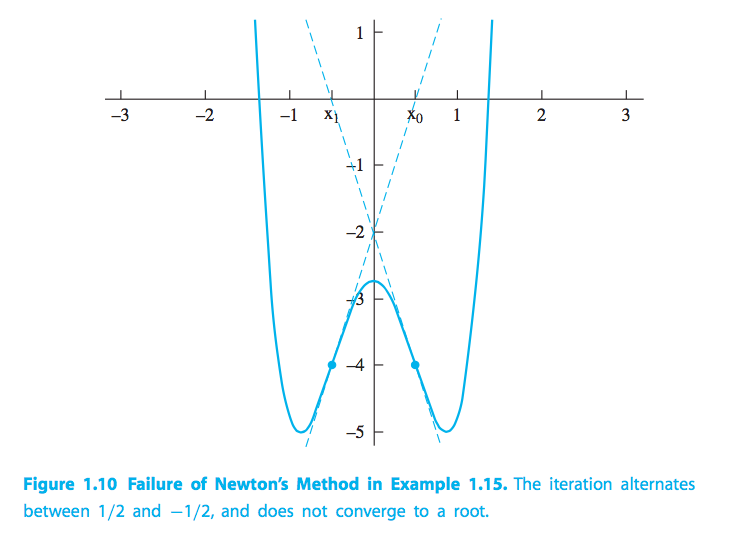

In [62]:
Image(filename='Images/01_5.png')

### 1.5 Root-Finding without Derivatives

### 1.5.1 Secant Method

The **Secant Method** is similar to the Newton’s Method, but replaces the derivative by a difference quotient. Geometrically, the tangent line is replaced with a line through the two last known guesses. The intersection point of the "secant line" is the new guess.

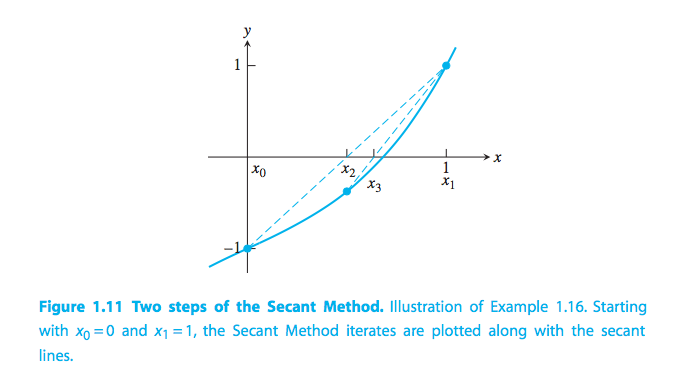

In [63]:
Image(filename='Images/01_6.png')

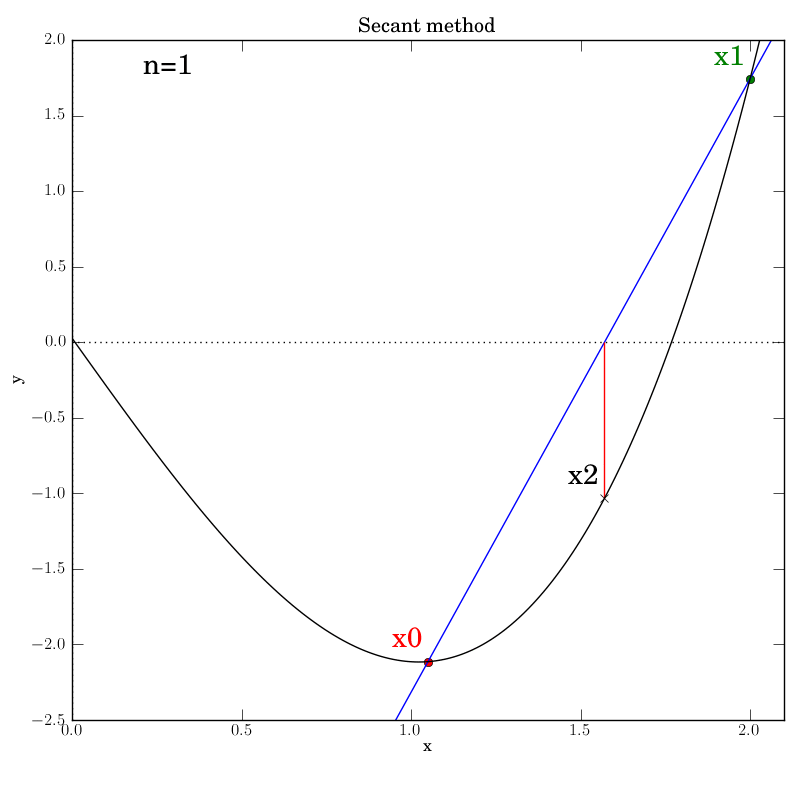

In [64]:
Image(filename='Images/secant.gif')

An approximation for the derivative at the current guess $x_i$ is the difference quotient

$$\frac{f(x_i) - f(x_{i-1})}{x_i - x_{i-1}}.$$

A straight replacement of this approximation for $f'(x_i)$ in Newton’s Method yields the ￼￼iterative scheme of the Secant Method:

$$x_0, x_1 = {\mbox{ initial guesses }}$$<br/>
$$x_{i+1} = x_i - \frac{f(x_i)(x_i - x_{i-1})}{f(x_i) - f(x_{i-1})}, {\mbox{ for }} i = 1, 2, \ldots$$

Notice that unlike Fixed-Point Iteration and Newton’s Method, **two starting guesses** are needed to begin the Secant Method.

It can be shown that if the Secant Method converges to $r$ and $f'(r) \neq 0$, the convergence of the Seacant Method is **superlinear** in the sense that the error $e_i = |f(x_i) - r|$ at step $i$ converges asymptotically to:

$$\frac{e_{i+1}}{e_i^{\alpha}} \approx \Big|\frac{f''(r)}{2 f'(r)}\Big|^{\alpha-1},$$

where $\alpha = (1 + \sqrt(5))/2 \approx 1.62$.

In [65]:
def secant_df(f, x0, x1, max_iter, k):
    fx0=f(x0)
    fx1=f(x1)
    TOL=10**(-k)
    iteration=[0,1]
    root=[x0,x1]
    s=2
    while s<max_iter and abs(x1-x0)>TOL:
        x = x1 - fx1*(x1 - x0)/(fx1 - fx0)
        x0,x1=x1,x
        fx0,fx1=fx1,f(x)
        iteration.append(s)
        root.append(round(float(x),k))
        s+=1
    print(f'Approximate_Root: {x}\nIterations: {s}')
    pd.set_option('precision', k)
    df=pd.DataFrame(
        {'Iteration': iteration,
         'Approximate_Root': root}) 
    df.set_index('Iteration', inplace=True)
    return df 

### <span style="color:#19bfc2">EXAMPLE 1.16</span>

In [66]:
f = lambda x: x**3 + x - 1

x0=0
x1=1
max_iter=100
k=14

secant_df(f, x0, x1, max_iter, k)

Approximate_Root: 0.6823278038280193
Iterations: 10


Approximate_Root
Iteration                  
0          0.00000000000000
1          1.00000000000000
2          0.50000000000000
3          0.63636363636364
4          0.69005235602094
5          0.68202041964819
6          0.68232578140989
7          0.68232780435903
8          0.68232780382802
9          0.68232780382802

### Method of False Position

The **Method of False Position** at first appears to be an improvement on both the Bisection Method and the Secant Method, taking the best properties of each. While the Bisection Method guarantees cutting the interval $[a,b]$ in the middle, False Position considers a chord joining the two points $(a,f(a))$ and $(b,f(b))$ and takes the point at which the chord intersects the $x$ axis.

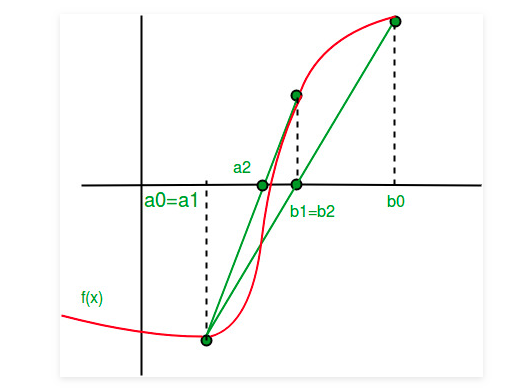

In [67]:
Image(filename='Images/01_7.png')

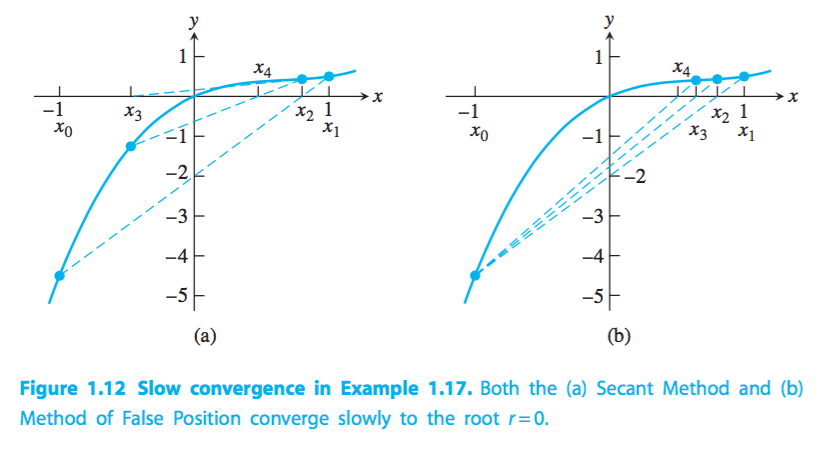

In [68]:
Image(filename='Images/01_8.png')

In [69]:
def regulaFalsi_df(f, a, b, max_iter, k):
    TOL=10**(-k)
    if f(a) * f(b) >= 0: 
        print("You have not assumed right a and b") 
        return -1
    x = a # Initialize result 
    iteration=[0,1]
    root=[x0,x1]
    s=2
    iter=0
    while s<max_iter and abs(b-a)>TOL:
        # Find the point that touches x axis 
        x = b - f(b)*(b - a)/(f(b) - f(a))
        iteration.append(s)
        root.append(round(float(x),k))
        # Check if the above found point is root 
        if abs(f(x)) < TOL: #fx == 0: 
            break
        # Decide the side to repeat the steps 
        elif f(x) * f(a) < 0: 
            b = x 
        else: 
            a = x 
        s+=1
        iter+=1
    print(f'Approximate_Root: {x}\nIterations: {iter}')
    pd.set_option('precision', k)
    df=pd.DataFrame(
        {'Iteration': iteration,
         'Approximate_Root': root}) 
    df.set_index('Iteration', inplace=True)
    return df 

### <span style="color:#19bfc2">EXAMPLE 1.17</span>

In [70]:
f = lambda x: x**3 - 2*x**2 + (3/2)*x

a=-1
b=1
max_iter=100
k=8

regulaFalsi_df(f, a, b, max_iter, k)

Approximate_Root: 4.800237832265254e-09
Iterations: 49


Approximate_Root
Iteration                  
0                0.00000000
1                1.00000000
2                0.80000000
3                0.64233577
4                0.50724082
5                0.39079015
6                0.29297471
7                0.21394907
8                0.15268549
9                0.10694125
10               0.07382866
11               0.05042883
12               0.03418401
13               0.02304895
14               0.01548401
15               0.01037595
16               0.00694122
17               0.00463819
18               0.00309691
19               0.00206674
20               0.00137877
21               0.00091960
22               0.00061326
23               0.00040892
24               0.00027265
25               0.00018178
26               0.00012120
27               0.00008080
28               0.00005387
29               0.00003591
30               0.00002394
31               0.00001596
32               0.00001064
33               0.00000709
34               0.00000473
35               0.00000315
36               0.00000210
37               0.00000140
38               0.00000093
39               0.00000062
40               0.00000042
41               0.00000028
42               0.00000018
43               0.00000012
44               0.00000008
45               0.00000005
46               0.00000004
47               0.00000002
48               0.00000002
49               0.00000001
50               0.00000001
51               0.00000000

### 1.5.2 Brent's Method

In [71]:
f=lambda x: x**3+x-1

root = optimize.brenth(f, 0, 1)
root

0.6823278038280195